In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import iqr
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [20]:
from google.colab import drive
drive.mount('/content/drive')
# خواندن فایل CSV به عنوان یک جدول
data = pd.read_csv("/content/drive/MyDrive/Dataset/Customer-Churn.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
data = data.drop(['gender'], axis=1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<ipython-input-24-43ad4982d6f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set1')


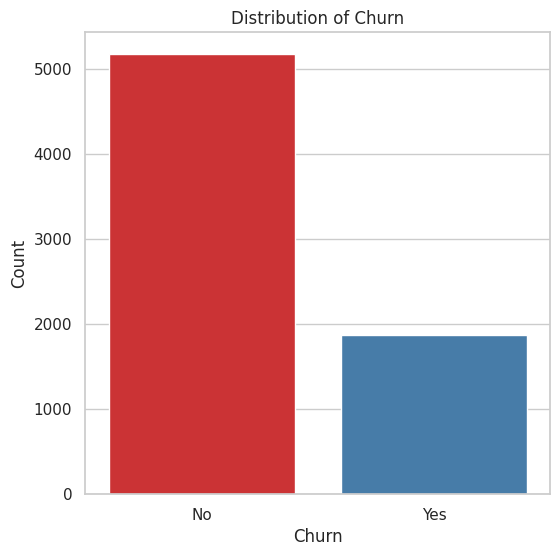

In [24]:
# Assuming 'data' is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

# Plotting the countplot for 'Churn'
sns.countplot(x='Churn', data=data, palette='Set1')

# Adding labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')

# Show the plot
plt.show()

<ipython-input-25-0479c9accfc4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=balanced_data, palette='Set1')


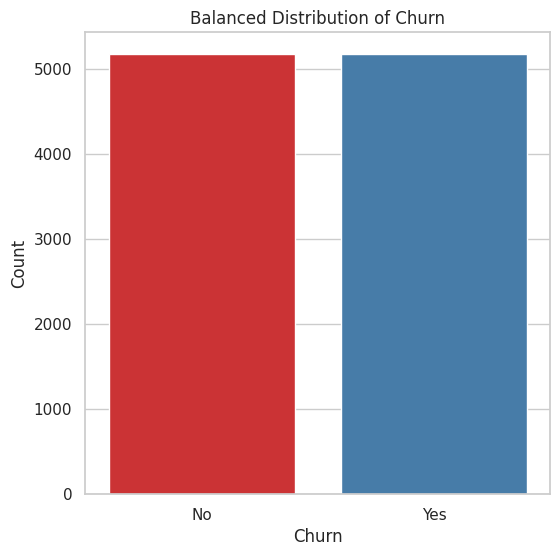

In [25]:
# Assuming 'data' is your DataFrame
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(data.drop('Churn', axis=1), data['Churn'])

# Create a new balanced DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Plot the balanced 'Churn' distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.countplot(x='Churn', data=balanced_data, palette='Set1')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Balanced Distribution of Churn')

# Show the plot
plt.show()

In [38]:
# Assuming 'balanced_data' is your balanced DataFrame
X = balanced_data.drop('Churn', axis=1)
y = balanced_data['Churn']

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include='object').columns

# Create transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define models to run
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Iterate over selected models
for model_name, model in models.items():
    print(f"\n** Model: {model_name} **")

    # Calculate Tukey's Fences for each numeric column
    for col in numeric_cols:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = iqr(X[col])
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        # Identify outliers based on Tukey's Fences
        outliers = (X[col] < lower_fence) | (X[col] > upper_fence)

        # Remove outliers from the data
        X = X[~outliers]
        y = y[~outliers]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Convert labels to numerical values
    y_train_numeric = y_train.map({'No': 0, 'Yes': 1})
    y_test_numeric = y_test.map({'No': 0, 'Yes': 1})

    # Build a pipeline with preprocessor and the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Time measurement
    start_time = time.time()
    pipeline.fit(X_train, y_train_numeric)
    end_time = time.time()
    runtime = end_time - start_time
    print(f"Training Runtime: {runtime:.2f} seconds")

    # Evaluate on test data
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test_numeric, y_pred)
    precision = precision_score(y_test_numeric, y_pred)
    recall = recall_score(y_test_numeric, y_pred)
    f1 = f1_score(y_test_numeric, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


** Model: Logistic Regression **
Training Runtime: 0.70 seconds
Accuracy: 0.8687
Precision: 0.8357
Recall: 0.8966
F1-Score: 0.8651

** Model: Decision Tree **
Training Runtime: 0.97 seconds
Accuracy: 0.8789
Precision: 0.8268
Recall: 0.9387
F1-Score: 0.8792

** Model: SVM **
Training Runtime: 5.23 seconds
Accuracy: 0.8088
Precision: 0.7850
Recall: 0.8161
F1-Score: 0.8003

** Model: Random Forest **
Training Runtime: 9.20 seconds
Accuracy: 0.8987
Precision: 0.8603
Recall: 0.9361
F1-Score: 0.8966


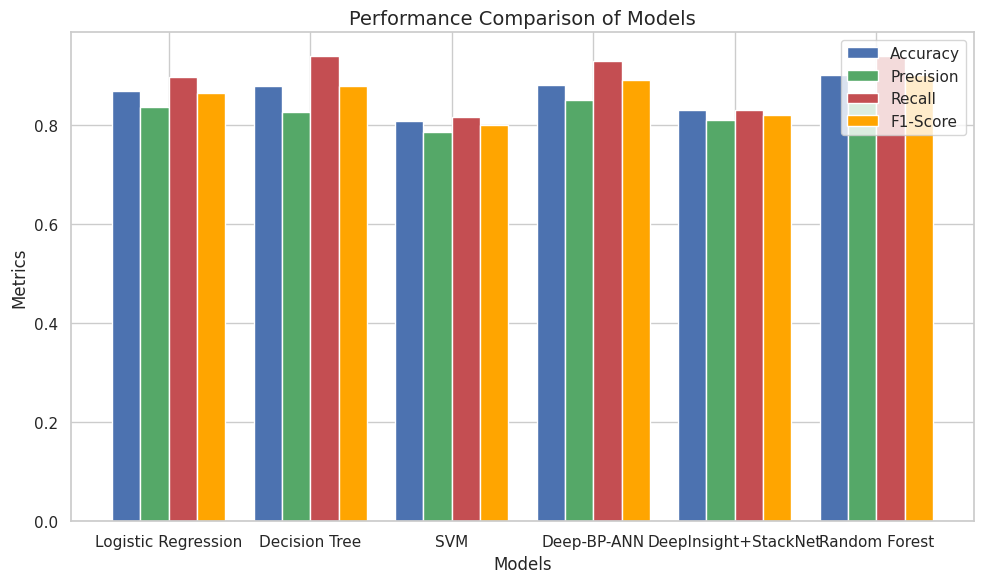

In [28]:
# Define model names and their performance metrics
model_names = ["Logistic Regression", "Decision Tree", "SVM","Deep-BP-ANN", "DeepInsight+StackNet", "Random Forest"]
accuracy = [0.8687, 0.8789, 0.8088, 0.88, 0.83, 0.90]
precision = [0.8357, 0.8268, 0.7850, 0.85, 0.81, 0.86]
recall = [0.8966, 0.9387, 0.8161, 0.93, 0.83, 0.94 ]
f1_score = [0.8651, 0.8792, 0.8003, 0.89, 0.82, 0.90]

# Number of models
num_models = len(model_names)

# Set width of bar
bar_width = 0.2

# Set x position for each group of bars
index = np.arange(num_models)

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy, color='b', width=bar_width, label='Accuracy')
plt.bar(index + bar_width, precision, color='g', width=bar_width, label='Precision')
plt.bar(index + 2*bar_width, recall, color='r', width=bar_width, label='Recall')
plt.bar(index + 3*bar_width, f1_score, color='orange', width=bar_width, label='F1-Score')

# Adding labels
plt.xlabel('Models', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Performance Comparison of Models', fontsize=14)
plt.xticks(index + 1.5*bar_width, model_names)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

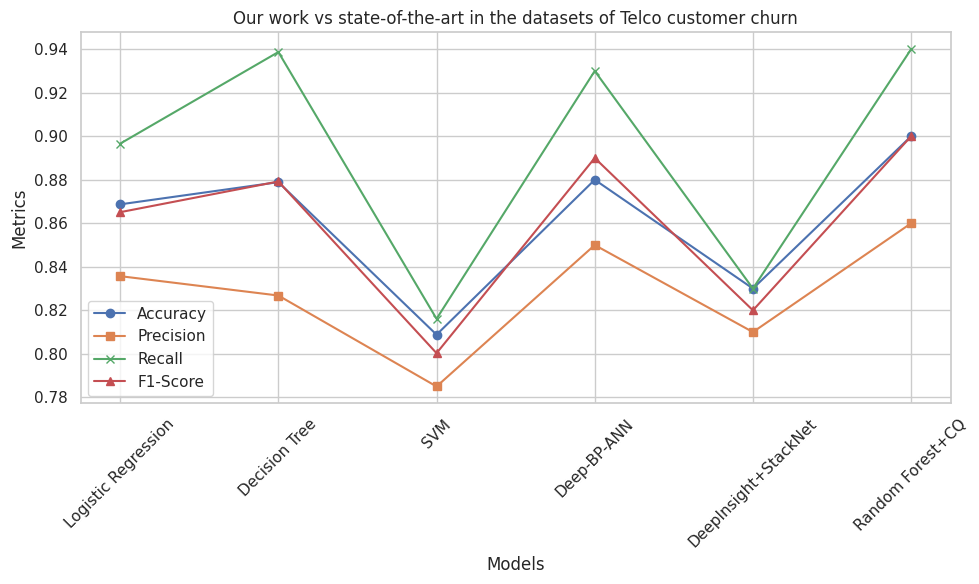

In [41]:
# Define model names
model_names = ["Logistic Regression", "Decision Tree", "SVM", "Deep-BP-ANN", "DeepInsight+StackNet", "Random Forest+CQ"]
accuracy = [0.8687, 0.8789, 0.8088, 0.88, 0.83, 0.90]
precision = [0.8357, 0.8268, 0.7850, 0.85, 0.81, 0.86]
recall = [0.8966, 0.9387, 0.8161, 0.93, 0.83, 0.94]
f1_score = [0.8651, 0.8792, 0.8003, 0.89, 0.82, 0.90]

# Create subplots
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(model_names, accuracy, marker='o', label='Accuracy')

# Plot precision
plt.plot(model_names, precision, marker='s', label='Precision')

# Plot recall
plt.plot(model_names, recall, marker='x', label='Recall')

# Plot F1-score
plt.plot(model_names, f1_score, marker='^', label='F1-Score')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Our work vs state-of-the-art in the datasets of Telco customer churn')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


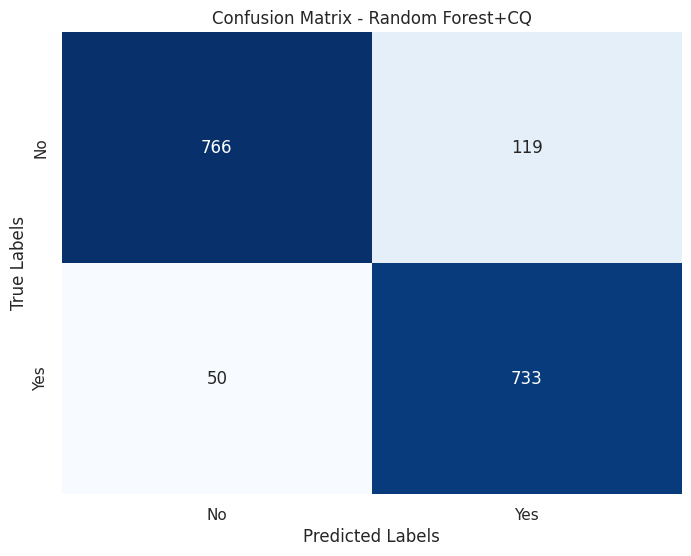

In [44]:
# Convert integer labels in y_pred to string labels
y_pred_str = np.where(y_pred == 0, 'No', 'Yes')

# Plot confusion matrix
unique_labels = sorted(set(y_test))
cm = confusion_matrix(y_test, y_pred_str, labels=unique_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - {model_name}+CQ')
plt.show()

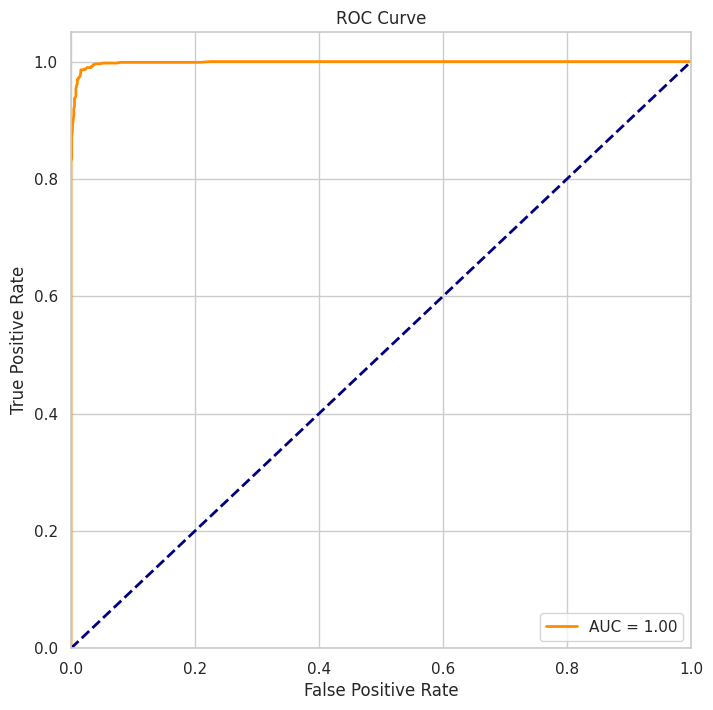

In [45]:
# Assuming you already have the 'pipeline_rf' and 'X_test' defined

# Get predicted probabilities
y_probs_rf = pipeline_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_numeric, y_probs_rf)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

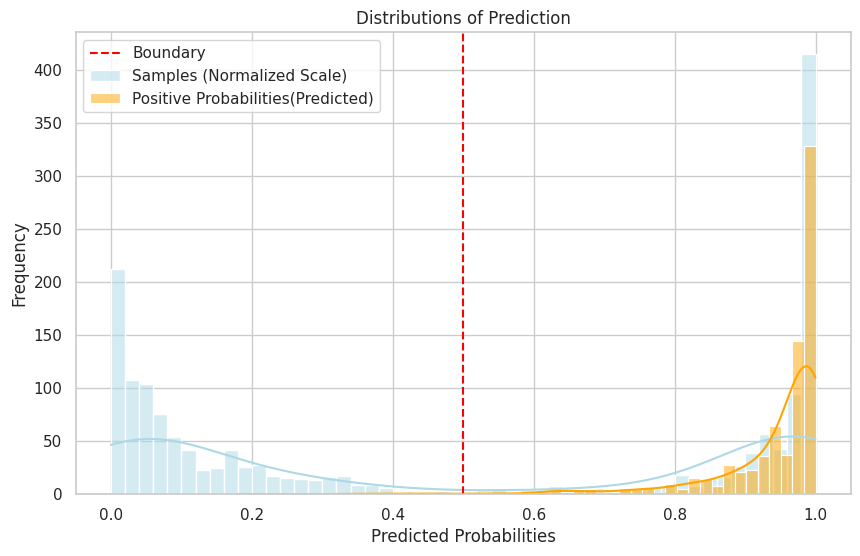

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of predicted probabilities
sns.histplot(y_probs_rf, kde=True, bins=50, color='lightblue', label='Samples (Normalized Scale)')

# Plot the positive probabilities
sns.histplot(y_probs_rf[y_test_numeric == 1], kde=True, bins=50, color='orange', label='Positive Probabilities(Predicted)')

# Add a boundary line
boundary = 0.5
ax.axvline(boundary, color='red', linestyle='--', label='Boundary')

# Add labels and title
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Distributions of Prediction')

# Add legend
plt.legend()

# Show the plot
plt.show()
